##      **Covid-19 X-Ray Image Detection**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Traffic Sign Detection" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset
!unzip covid19-image-dataset.zip -d covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 97% 153M/158M [00:03<00:00, 91.7MB/s]
100% 158M/158M [00:03<00:00, 47.9MB/s]
Archive:  covid19-image-dataset.zip
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0105.png  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0111.jpg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0112.jpg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0113.jpg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: covid19-image-dataset/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: covid19-image-dataset/Covid19-

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv  and test_data.csv file with columns image_path and label for further processing:-


In [17]:
import os
import pandas as pd

# Directory for train dataset
train_dir = '/content/covid19-image-dataset/Covid19-dataset/train'

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Function to process each directory
def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            print(f"Processing directory: {label_dir}")
            for image_name in os.listdir(label_dir):
                if image_name.lower().endswith(('.jpeg', '.jpg', '.png')):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)
                    print(f"Added image: {image_path} with label: {label}")

# Process the train directory
process_directory(train_dir, labels, image_paths)

# Create DataFrame and save to CSV
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/covid19-image-dataset/Covid19-dataset/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file for train directory saved successfully!")

Processing directory: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/04.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/072.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/033.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/081.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/061.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/016.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia/010.jpeg with label: Viral Pneumonia
Added image: /content/covid19-image-dataset/Covid19-dataset/train/Viral Pneum

In [18]:
import os
import pandas as pd

# Directory for test dataset
test_dir = '/content/covid19-image-dataset/Covid19-dataset/test'

# Initialize lists to hold image paths and labels
test_image_paths = []
test_labels = []

# Function to recursively process the test directory
def process_test_directory(directory, label_list, path_list):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith(('.jpeg', '.jpg', '.png')):
                image_path = os.path.join(root, file)
                path_list.append(image_path)
                label_list.append("Unknown")

# Process the test directory
process_test_directory(test_dir, test_labels, test_image_paths)

# Create DataFrame and save to CSV
test_data = {'Image_Path': test_image_paths, 'Label': test_labels}
test_df = pd.DataFrame(test_data)

test_csv_file_path = '/content/covid19-image-dataset/Covid19-dataset/test_data.csv'
test_df.to_csv(test_csv_file_path, index=False)

print("CSV file for test folder saved successfully!")

CSV file for test folder saved successfully!


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model Xception , VGG16 and ResNet50 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [54]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , DenseNet121 , VGG16 , MobileNetV2  , InceptionV3
from keras import layers, models, optimizers

# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [20]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/covid19-image-dataset/Covid19-dataset/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

3


In [39]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [22]:

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 200 validated image filenames belonging to 3 classes.
Found 51 validated image filenames belonging to 3 classes.


# Exploratory Data Analysis

In [23]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                            Image_Path            Label
158  /content/covid19-image-dataset/Covid19-dataset...            Covid
215  /content/covid19-image-dataset/Covid19-dataset...           Normal
101  /content/covid19-image-dataset/Covid19-dataset...            Covid
137  /content/covid19-image-dataset/Covid19-dataset...            Covid
66   /content/covid19-image-dataset/Covid19-dataset...  Viral Pneumonia
(200, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 158 to 102
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  200 non-null    object
 1   Label       200 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB
None
                                               Image_Path  Label
count                                                 200    200
unique                                                200      3
top     /content/covid19-image-dataset/Covid19-dataset... 

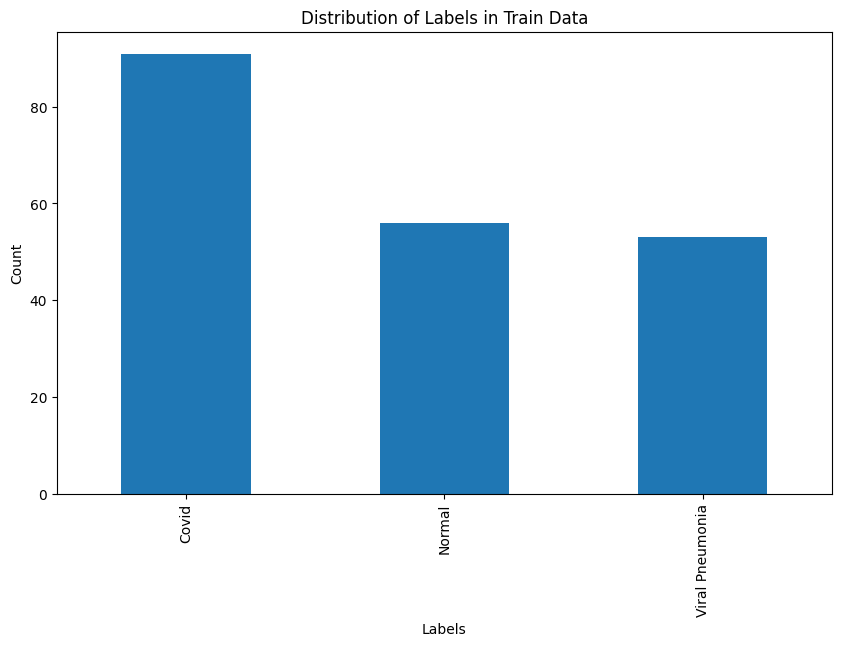

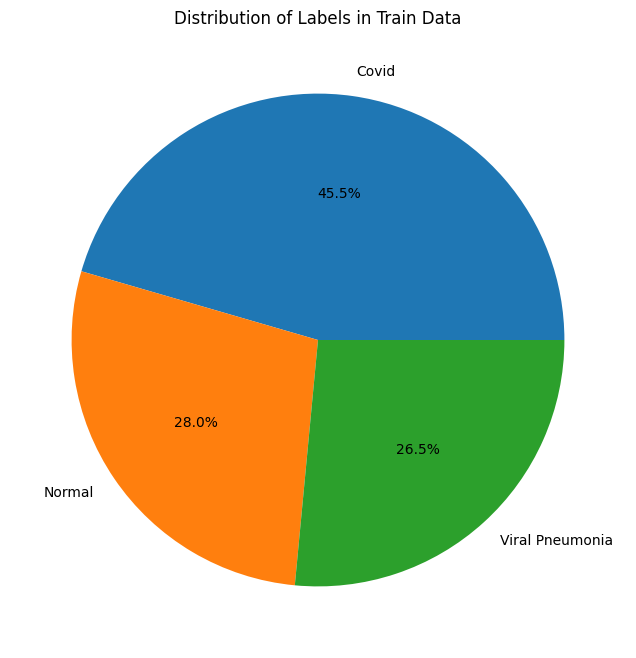

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame into train_df

# Plotting a bar graph
plt.figure(figsize=(10, 6))
train_df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels in Train Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Labels in Train Data')
plt.ylabel('')
plt.show()

Number of unique image paths: 200


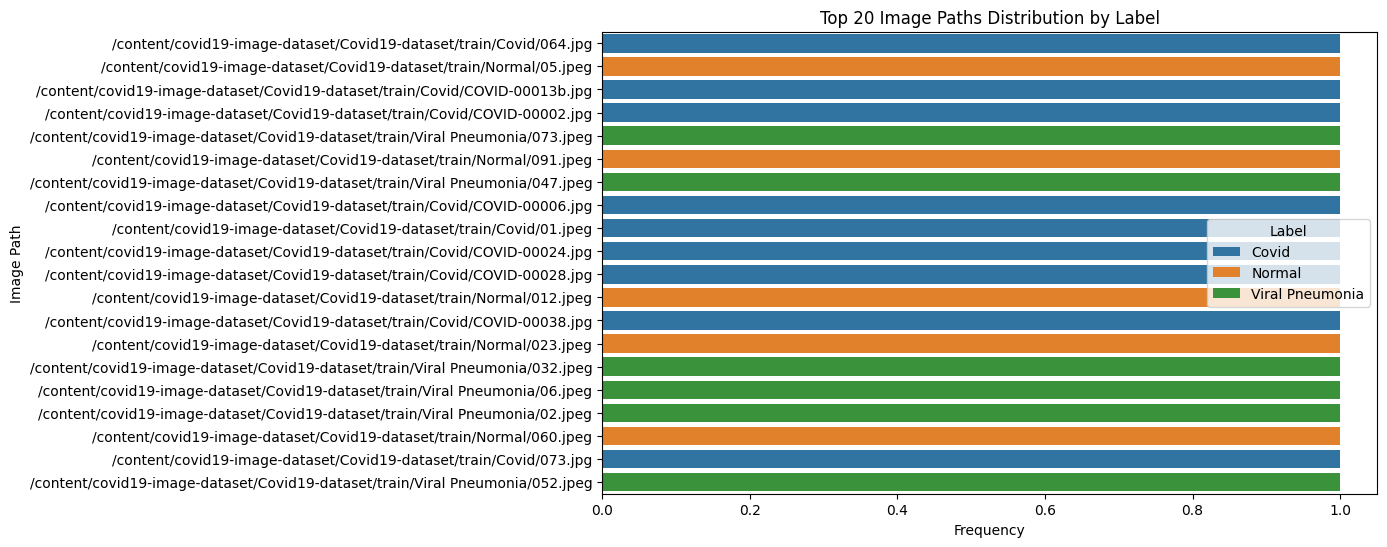

Column Image_Path has 200 unique values.
Column Label has 3 unique values.


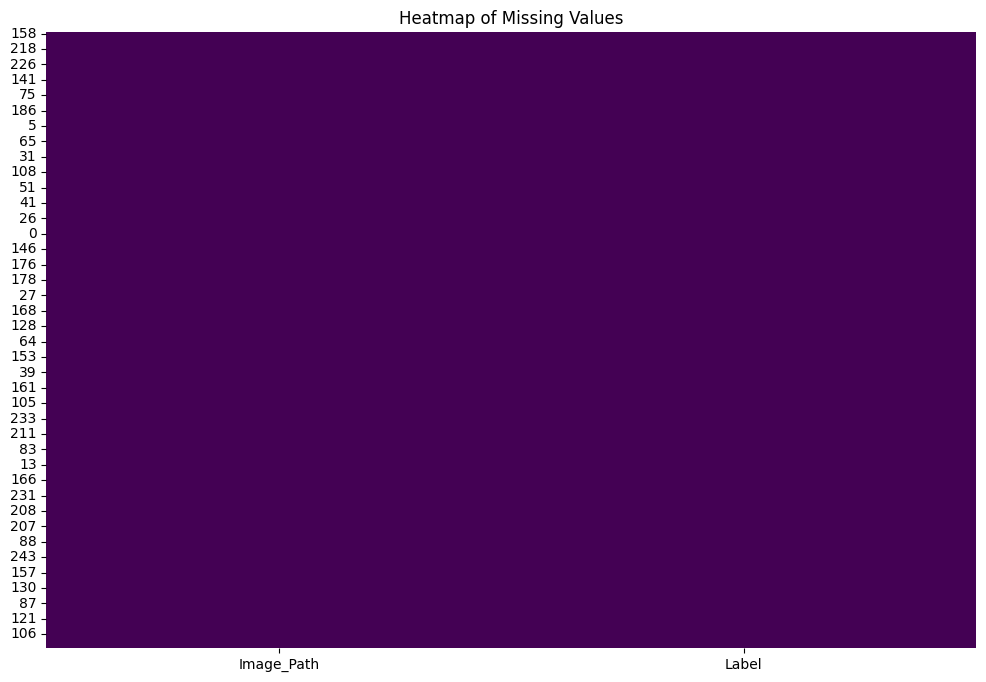

Label
Covid              91
Normal             56
Viral Pneumonia    53
Name: count, dtype: int64


In [25]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [26]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
dtype: int64
0


# Customizing model according to our usecase
This code snippet summarizes the process of creating a custom keras categorical classification model in Keras. It involves loading the pre-trained Xception , VGG16 and ResNet50  model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file .

In [31]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [59]:
from keras.callbacks import EarlyStopping , ReduceLROnPlateau
def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

    # Train the model with the specified number of epochs
    history = model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        callbacks=[early_stopping])

    # Evaluate the model
    val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    return history

In [60]:
def model_training (base_models):
  # Directory to save the models
  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Train and evaluate each model
  histories = {}
  for base_model, input_shape, model_name in base_models:
      # Resize data if necessary (dummy data, so not applicable here)
      if input_shape != (224, 224, 3):
          # Resize X_train and X_val to the required input_shape
          # This is just a placeholder, implement actual resizing if needed
          pass

      # Create the model
      model = create_model(base_model, input_shape, num_classes)

      epochs = 20
      optimizer = optimizers.Adam()

      # Compile the model
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      # Saving the model after training
      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Loading the Base-Model
This code snippet defines Xception , ResNet50 and VGG16 base model in Keras. The model is configured with an input shape of (224, 224, 3) for VGG16 & ResNet50 and input shape of (299 , 299 , 3) for Xception to match the size and channels of the images in the dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

Training VGG16...
Epoch 1/20
7/7 [==============================] - 14s 1s/step - loss: 1.2237 - accuracy: 0.3950 - val_loss: 1.0243 - val_accuracy: 0.3922
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 1.0931 - accuracy: 0.4050 - val_loss: 0.9318 - val_accuracy: 0.5686
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.9017 - accuracy: 0.5300 - val_loss: 0.8318 - val_accuracy: 0.5686
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.8211 - accuracy: 0.6150 - val_loss: 0.7879 - val_accuracy: 0.5490
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.8249 - accuracy: 0.5900 - val_loss: 0.8915 - val_accuracy: 0.5294
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.7604 - accuracy: 0.6250 - val_loss: 0.7342 - val_accuracy: 0.6078
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.8071 - accuracy: 0.5900 - val_loss: 0.7301 - val_accuracy: 0.5686
Epoch 8/20
7/7 [===

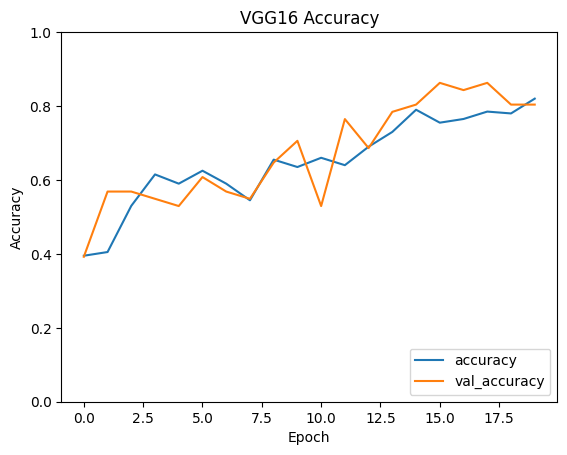

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved VGG16 model to saved_models/VGG16_saved.h5


In [61]:
# List of base models with their respective input shapes
base_models1 = [
    (VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3),'VGG16')
]
model_training (base_models1)

Training DenseNet121...
Epoch 1/20
7/7 [==============================] - 72s 2s/step - loss: 1.5274 - accuracy: 0.3750 - val_loss: 1.3563 - val_accuracy: 0.2745
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 1.0386 - accuracy: 0.5600 - val_loss: 1.1600 - val_accuracy: 0.4118
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.8259 - accuracy: 0.6500 - val_loss: 1.0231 - val_accuracy: 0.5098
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.7232 - accuracy: 0.6800 - val_loss: 0.8635 - val_accuracy: 0.6471
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5694 - accuracy: 0.7700 - val_loss: 0.7336 - val_accuracy: 0.7255
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.4223 - accuracy: 0.8300 - val_loss: 0.5850 - val_accuracy: 0.8039
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.3732 - accuracy: 0.8350 - val_loss: 0.4556 - val_accuracy: 0.8627
Epoch 8/20
7

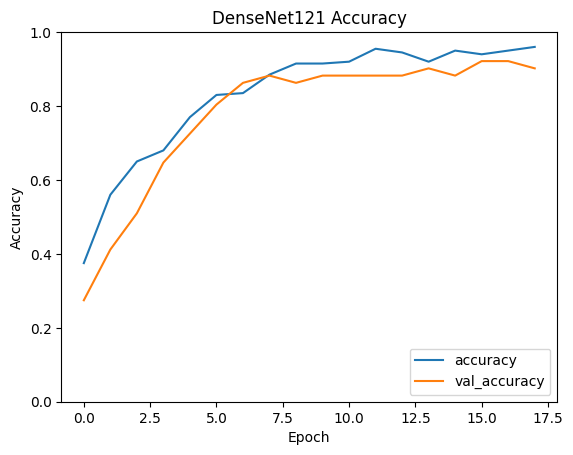

Saved DenseNet121 model to saved_models/DenseNet121_saved.h5


In [62]:
# List of base models with their respective input shapes
base_models2 = [
    (DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'DenseNet121')
]
model_training (base_models2)

9406464/9406464 [==============================] - 0s 0us/step
Training InceptionV3...
Epoch 1/20
7/7 [==============================] - 61s 2s/step - loss: 1.2274 - accuracy: 0.3750 - val_loss: 0.9756 - val_accuracy: 0.5490
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 1.0333 - accuracy: 0.5450 - val_loss: 0.8362 - val_accuracy: 0.5490
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.8461 - accuracy: 0.6100 - val_loss: 0.7442 - val_accuracy: 0.7059
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.6823 - accuracy: 0.7100 - val_loss: 0.6971 - val_accuracy: 0.6471
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.5682 - accuracy: 0.7650 - val_loss: 0.7828 - val_accuracy: 0.5490
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.4985 - accuracy: 0.8000 - val_loss: 0.7815 - val_accuracy: 0.5882
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.3690 - accuracy: 0.

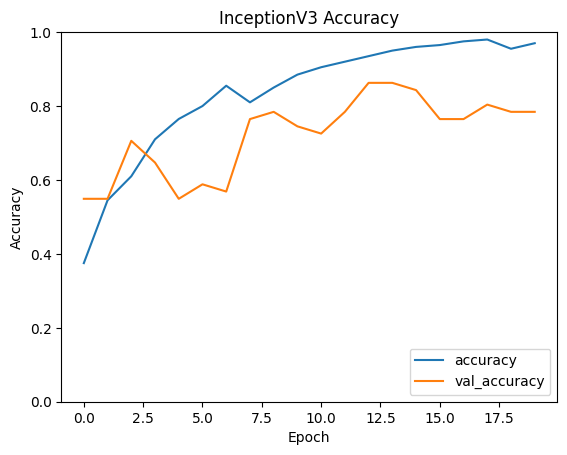

Saved InceptionV3 model to saved_models/InceptionV3_saved.h5
Training Xception...
Epoch 1/20
7/7 [==============================] - 51s 3s/step - loss: 1.1130 - accuracy: 0.3700 - val_loss: 1.0392 - val_accuracy: 0.3333
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 1.0044 - accuracy: 0.5300 - val_loss: 0.9170 - val_accuracy: 0.5686
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.8536 - accuracy: 0.6500 - val_loss: 0.8211 - val_accuracy: 0.6863
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.7426 - accuracy: 0.7000 - val_loss: 0.7263 - val_accuracy: 0.7451
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.6364 - accuracy: 0.7550 - val_loss: 0.6308 - val_accuracy: 0.7647
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.5360 - accuracy: 0.7850 - val_loss: 0.5672 - val_accuracy: 0.6667
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.4231 - accuracy: 0.8600 

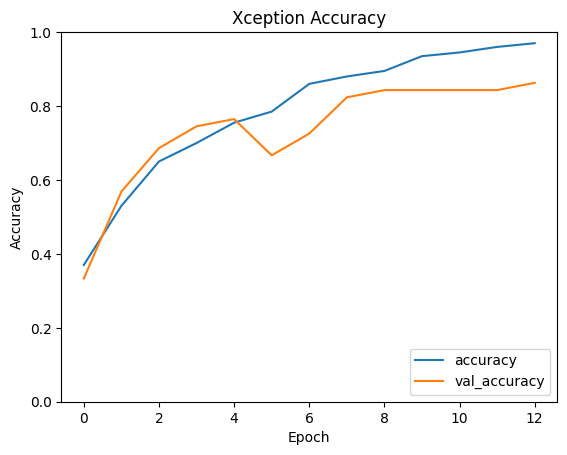

Saved Xception model to saved_models/Xception_saved.h5
Training MobileNetV2...
Epoch 1/20
7/7 [==============================] - 42s 2s/step - loss: 1.2274 - accuracy: 0.4000 - val_loss: 1.1218 - val_accuracy: 0.3922
Epoch 2/20
7/7 [==============================] - 10s 2s/step - loss: 1.0524 - accuracy: 0.5400 - val_loss: 1.0478 - val_accuracy: 0.4118
Epoch 3/20
7/7 [==============================] - 7s 1s/step - loss: 0.8208 - accuracy: 0.5850 - val_loss: 0.9822 - val_accuracy: 0.4510
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.7260 - accuracy: 0.7050 - val_loss: 0.9346 - val_accuracy: 0.4118
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.6577 - accuracy: 0.7450 - val_loss: 0.8736 - val_accuracy: 0.5098
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.5071 - accuracy: 0.7800 - val_loss: 0.7862 - val_accuracy: 0.6275
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.4355 - accuracy: 0.8350 

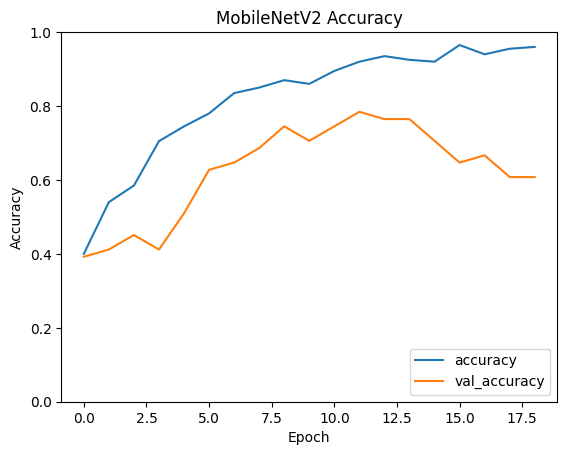

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [63]:
base_models3 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'InceptionV3'),
  (Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'Xception'),
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training (base_models3)

Training MobileNetV2...
Epoch 1/20
7/7 [==============================] - 35s 2s/step - loss: 1.5131 - accuracy: 0.2900 - val_loss: 1.1193 - val_accuracy: 0.3725
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 1.1479 - accuracy: 0.4200 - val_loss: 1.0260 - val_accuracy: 0.4118
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.9865 - accuracy: 0.5500 - val_loss: 0.9623 - val_accuracy: 0.4706
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.7529 - accuracy: 0.6350 - val_loss: 0.8870 - val_accuracy: 0.5098
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.6354 - accuracy: 0.7450 - val_loss: 0.8119 - val_accuracy: 0.7059
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.5015 - accuracy: 0.7850 - val_loss: 0.7468 - val_accuracy: 0.7255
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.5053 - accuracy: 0.8050 - val_loss: 0.6859 - val_accuracy: 0.7451
Epoch 8/20
7/7 

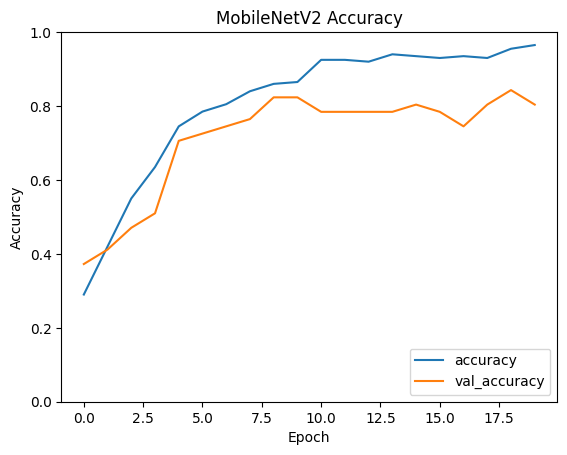

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [65]:
base_models4 = [
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training (base_models4)

# Testing and labeling unseen data

In [69]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

# Load test dataset
test_df = pd.read_csv('/content/covid19-image-dataset/Covid19-dataset/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 [==============================] - 2s 2s/step
Predictions saved to /content/saved_models/predicted_Xception_saved.csv
1/1 [==============================] - 2s 2s/step
Predictions saved to /content/saved_models/predicted_MobileNetV2_saved.csv
1/1 [==============================] - 1s 1s/step
Predictions saved to /content/saved_models/predicted_VGG16_saved.csv
1/1 [==============================] - 4s 4s/step
Predictions saved to /content/saved_models/predicted_InceptionV3_saved.csv
1/1 [==============================] - 4s 4s/step
Predictions saved to /content/saved_models/predicted_DenseNet121_saved.csv


# image label and prediction and visualization

Predictions using: predicted_DenseNet121_saved


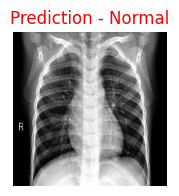

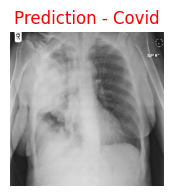

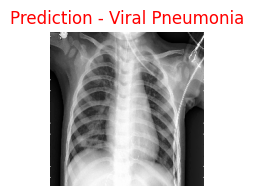

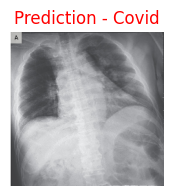

Predictions using: predicted_Xception_saved


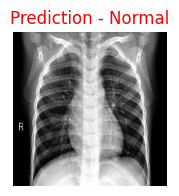

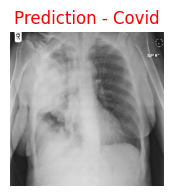

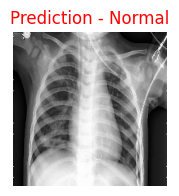

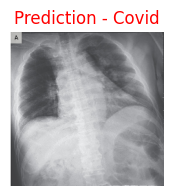

Predictions using: predicted_MobileNetV2_saved


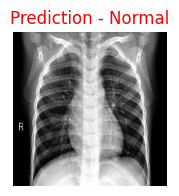

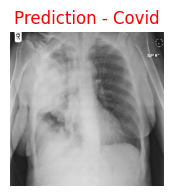

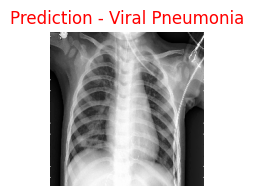

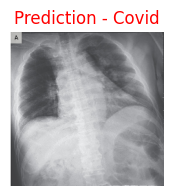

Predictions using: predicted_VGG16_saved


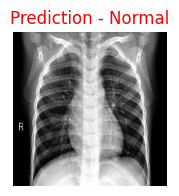

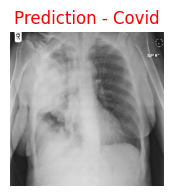

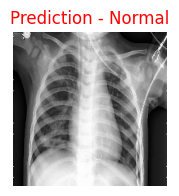

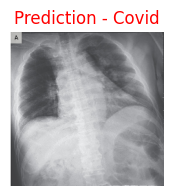

Predictions using: predicted_InceptionV3_saved


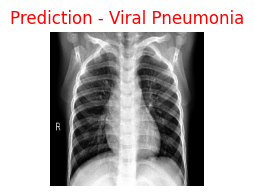

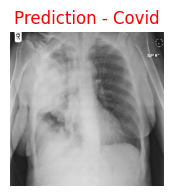

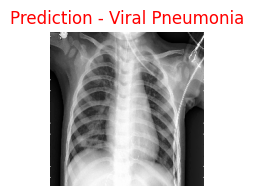

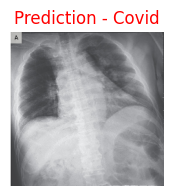

In [70]:
import csv
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg',
    '/content/covid19-image-dataset/Covid19-dataset/test/Covid/0113.jpg',
    '/content/covid19-image-dataset/Covid19-dataset/test/Viral Pneumonia/0113.jpeg',
    '/content/covid19-image-dataset/Covid19-dataset/test/Covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'
]

def load_predicted_labels(csv_file_path):
    predicted_labels = {}
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Label']
    return predicted_labels

def visualize_predictions(filenames, predicted_labels):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0  # Normalize the image

        # Check if the filename is in predicted_labels
        if filename in predicted_labels:
            predicted_class_name = predicted_labels[filename]
        else:
            print(f"Filename not found: {filename}")
            predicted_class_name = "Unknown"  # Handle cases where filename not found

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)  # Display the processed image
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Directory containing the predicted CSV files
csv_dir = '/content/saved_models'

# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.startswith('predicted_') and csv_file.endswith('.csv'):
        # Determine the model name
        model_name = csv_file.split('.')[0]

        # Path to the CSV file containing predictions for the current model
        predicted_csv_file = os.path.join(csv_dir, csv_file)

        # Load predicted labels from the CSV file
        predicted_labels = load_predicted_labels(predicted_csv_file)

        # Predict and plot images using predicted labels
        print(f"Predictions using: {model_name}")
        visualize_predictions(filenames, predicted_labels)